In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

#from altaipony.flarelc import FlareLightCurve
from altaipony.fakeflares import aflare

import os
import copy

import numpy as np
import pandas as pd

#from funcs.custom_detrending import custom_detrending, iteratively_remove_sines
from funcs.funcs import read_custom_aperture_lc
from funcs.multiperiod import remove_sinusoidal, fetch_lightcurve
from funcs.flarefit import aflare2

#import astropy.units as u

from scipy import optimize
from scipy.misc import derivative

CWD = "/".join(os.getcwd().split("/")[:-2])

import warnings
warnings.simplefilter("ignore")

import pytest

import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
lcs = pd.read_csv(f"{CWD}/data/summary/lcs.csv")
lcs

,ID,QCS,typ,cadence_min,mission,prefix,origin,h_mission,SpT,view_start,...,Dec,J,R,Gaia_G,vsini_kms,e_vsini_kms,Prot_d,sini,Ref,identifier
0,100004076,14,slc,1,kep,KIC,generic,Kepler,L1,1356.50,...,40.185721,13.078,NaN,17.8356,11.2,2.2,0.37015,>.59,Gizis+13,WISEP J190648.47+401106.8
1,212035340,18,llc,30,ktwo,EPIC,generic,K2,M8,3437.00,...,20.843041,15.900,NaN,19.5667,30.0,12.0,0.19300,NaN,Paudel+19,MASS J08371832+2050349
2,237880881,1,slc,2,tess,TIC,generic,TESS,M5,1331.00,...,-62.983139,11.530,NaN,14.9796,14.4,2.6,0.35125,NaN,Kraus+14,2MASS J01180670-6258591
3,44984200,10,slc,2,tess,TIC,custom,TESS,M6,1587.25,...,-58.933056,10.309,15.08,14.4115,NaN,NaN,0.11300,NaN,this work,SCR J0838-5855
4,277539431,12,slc,2,tess,TIC,custom,TESS,M7,1641.00,...,-73.936397,10.630,NaN,14.7381,NaN,NaN,0.19000,NaN,this work,WISEA J105515.71-735611.3
5,300741820,8,slc,2,tess,TIC,generic,TESS,NaN,NaN,...,-66.808885,11.959,NaN,15.3277,NaN,NaN,0.13200,NaN,Zhan+19,UCAC4 116-015389


In [3]:
target = lcs.loc[4]
target


ID                             277539431
QCS                                   12
typ                                  slc
cadence_min                            2
mission                             tess
prefix                               TIC
origin                            custom
h_mission                           TESS
SpT                                   M7
view_start                          1641
view_stop                         1643.5
view_min                             750
view_max                             970
BJDoff                         2.457e+06
tstart                           1641.84
ampl_min                             0.9
ampl_max                             1.7
RA                               163.815
Dec                             -73.9364
J                                  10.63
R                                    NaN
Gaia_G                           14.7381
vsini_kms                            NaN
e_vsini_kms                          NaN
Prot_d          

### Load the light curve and find the median flux and standard deviation to get a sense for the noise

TIC 277539431 modulation period:  4.556908315121535 h
Relative amplitude of modulation: 5.4e-03


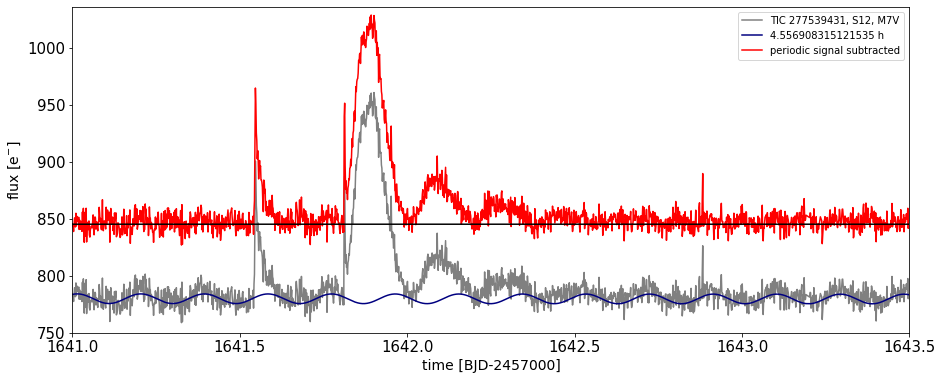

In [4]:
flck = fetch_lightcurve(target)

t, sflux, model, period = remove_sinusoidal(target, plot=True, save=False)

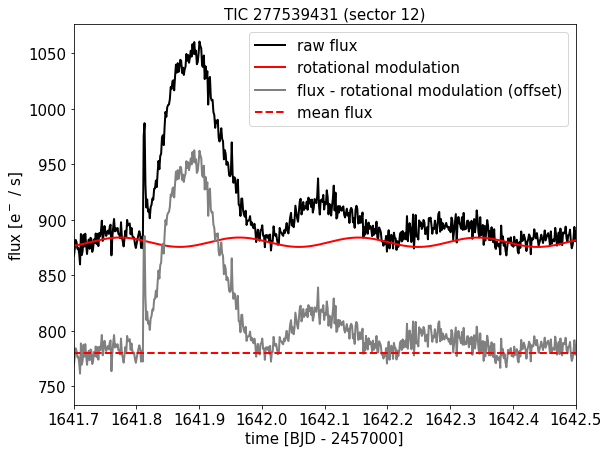

In [34]:
plt.figure(figsize=(9,7))
plt.plot(flck.time, flck.flux+100, c="k",
         linewidth=2,
         label="raw flux")
plt.plot(t,model+100,c="r",label="rotational modulation",linewidth=2,)
plt.plot(t, sflux, c="grey",linewidth=2,label="flux - rotational modulation (offset)")

plt.plot(t,[np.nanmean(model)]*len(t),c="red",linestyle="dashed",linewidth=2,label="mean flux")


plt.xlim(1641.7,1642.5)
plt.legend(fontsize=15)
plt.title(f"TIC {target.ID} (sector {target.QCS})",fontsize=15)
plt.ylabel(r"flux [e$^-$ / s]",fontsize=15)
plt.xlabel(f"time [BJD - {int(target.BJDoff)}]",fontsize=15)
plt.savefig(f"{CWD}/analysis/plots/ddt/ddt_lightcurve.png",dpi=150)